# Machine Learning models

In [41]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix    
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [54]:
def calculate_eval_measure(model,features,target):
    y_pred = model.predict(features)
    tn, fp, fn, tp = confusion_matrix(y_pred,target).ravel()
    print('TP: {}, TN: {}'.format(tp,tn))
    print('FP: {}, FN: {}'.format(fp,fn))
    print(f"Model Accuracy : {accuracy_score(y_pred,target)*100:.2f}%")
    print(f"Model F1-Score : {f1_score(y_pred,target)*100:.2f}%")
    print(f"Model Precision : {precision_score(y_pred,target)*100:.2f}%")
    print(f"Model recall : {recall_score(y_pred,target)*100:.2f}%")

In [43]:
def create_fi_plot(model):
    
    if type(model)!=CatBoostClassifier:
        features = model.feature_names_in_
    else:
        features = model.feature_names_
        
    importances = model.feature_importances_
        
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()    

In [19]:
df = pd.read_parquet('../data/processed/bank_data_prepro.parquet')
df.head()

,age,education,default,balance,housing,loan,month,campaign,pdays,y,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,type_set
0,-0.933333,2.0,0.0,-0.290202,1.0,0.0,5.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train
1,0.333333,1.0,0.0,-0.327599,1.0,1.0,5.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train
2,0.866667,2.0,0.0,-0.243082,1.0,1.0,5.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train
3,0.666667,3.0,0.0,-0.044877,1.0,0.0,5.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train
4,1.400000,0.0,0.0,-0.249813,1.0,0.0,5.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,train


In [20]:
select_fns = ['age', 'education', 'default', 'balance', 'housing', 'loan',
       'month', 'campaign', 'pdays', 'pdays_cat', 'previous']+['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']

In [21]:
df = df[select_fns+['y','type_set']]

In [24]:
list(df)

['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'month',
 'campaign',
 'pdays',
 'pdays_cat',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'y',
 'type_set']

In [25]:
categorical_features = ['education',
 'default','housing',
 'loan',
 'month','pdays_cat',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

In [26]:
df[categorical_features] = df[categorical_features].astype('int')

In [27]:
X_train,y_train = df[df.type_set=='train'].drop(['y','type_set'],axis=1), df[df.type_set=='train'].y
X_test,y_test = df[df.type_set=='test'].drop(['y','type_set'],axis=1), df[df.type_set=='test'].y
X_val,y_val = df[df.type_set=='val'].drop(['y','type_set'],axis=1), df[df.type_set=='val'].y

## Random Forest

Le variabili più importanti sono:
1. balance
2. age
3. month
4. campaign
5. pdays
6. education
7. housing
8. job (management)
9. loan
10. previous
11. pdays_cat
12. default

In [28]:
classifier=RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 123)
#classifier.fit(X_train,y_train)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=123)

In [55]:
calculate_eval_measure(classifier,X_train,y_train)

TP: 1837, TN: 3729
FP: 137, FN: 81
Model Accuracy : 96.23%
Model F1-Score : 94.40%
Model Precision : 93.06%
Model recall : 95.78%


In [56]:
calculate_eval_measure(classifier,X_test,y_test)

TP: 286, TN: 6464
FP: 331, FN: 1475
Model Accuracy : 78.89%
Model F1-Score : 24.05%
Model Precision : 46.35%
Model recall : 16.24%


In [57]:
calculate_eval_measure(classifier,X_val,y_val)

TP: 233, TN: 5162
FP: 260, FN: 1189
Model Accuracy : 78.83%
Model F1-Score : 24.33%
Model Precision : 47.26%
Model recall : 16.39%


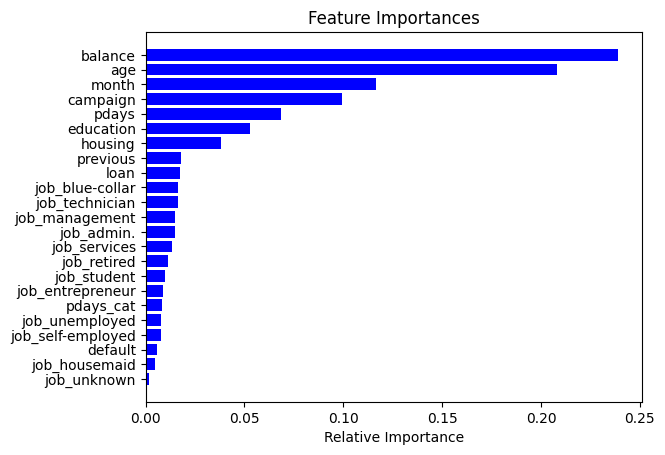

In [32]:
create_fi_plot(classifier)

## Catboost

In [33]:
from catboost import CatBoostClassifier

In [34]:
cb = CatBoostClassifier(
        iterations=3000,  # You can adjust the number of iterations based on your dataset and requirements
        cat_features=categorical_features,early_stopping_rounds=10,
        random_seed=42,  # For reproducibility
        logging_level='Verbose',eval_metric='Precision'  # Set to 'Verbose' to see training progress
    )

In [35]:
cb.fit(X_train, y_train)

Learning rate set to 0.007959
0:	learn: 0.6469136	total: 75.8ms	remaining: 3m 47s
1:	learn: 0.7176471	total: 85ms	remaining: 2m 7s
2:	learn: 0.7190900	total: 89.6ms	remaining: 1m 29s
3:	learn: 0.7184369	total: 125ms	remaining: 1m 33s
4:	learn: 0.7199603	total: 191ms	remaining: 1m 54s
5:	learn: 0.7204611	total: 198ms	remaining: 1m 38s
6:	learn: 0.7172285	total: 203ms	remaining: 1m 26s
7:	learn: 0.7217069	total: 211ms	remaining: 1m 19s
8:	learn: 0.7161410	total: 241ms	remaining: 1m 20s
9:	learn: 0.7195234	total: 246ms	remaining: 1m 13s
10:	learn: 0.7172093	total: 250ms	remaining: 1m 7s
11:	learn: 0.7113594	total: 255ms	remaining: 1m 3s
12:	learn: 0.7118803	total: 261ms	remaining: 59.9s
13:	learn: 0.7074766	total: 265ms	remaining: 56.5s
14:	learn: 0.7107981	total: 269ms	remaining: 53.5s
15:	learn: 0.7066542	total: 276ms	remaining: 51.5s
16:	learn: 0.7074318	total: 282ms	remaining: 49.4s
17:	learn: 0.7079395	total: 285ms	remaining: 47.2s
18:	learn: 0.7086466	total: 297ms	remaining: 46.5s
1

In [58]:
calculate_eval_measure(cb,X_train,y_train)

TP: 1004, TN: 3576
FP: 970, FN: 234
Model Accuracy : 79.18%
Model F1-Score : 62.52%
Model Precision : 50.86%
Model recall : 81.10%


In [59]:
calculate_eval_measure(cb,X_test,y_test)

TP: 303, TN: 7258
FP: 314, FN: 681
Model Accuracy : 88.37%
Model F1-Score : 37.85%
Model Precision : 49.11%
Model recall : 30.79%


In [60]:
calculate_eval_measure(cb,X_val,y_val)

TP: 242, TN: 5793
FP: 251, FN: 558
Model Accuracy : 88.18%
Model F1-Score : 37.43%
Model Precision : 49.09%
Model recall : 30.25%


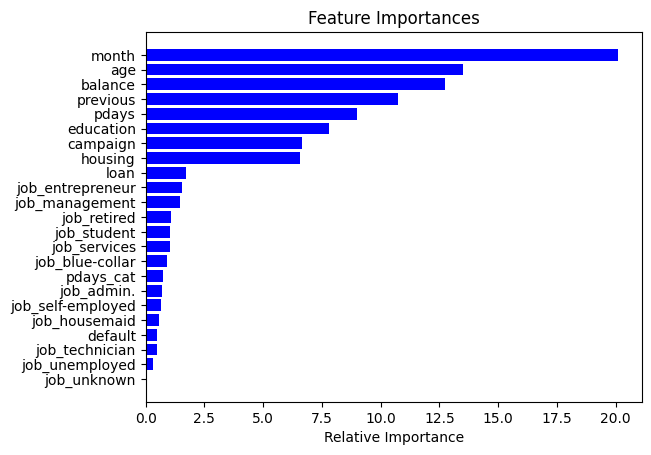

In [39]:
create_fi_plot(cb)